# Homework 5

## FINM 37400 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# 1. Forward Rates

Use the data set `famabliss_strips_2023-12-29.xlsx`.

It gives prices on **zero coupon bonds** with maturities of 1 through 5 years.
* These are prices per \\$1 face value on bonds that only pay principal.
* Such bonds can be created from treasuries by *stripping* out their coupons.
* In essence, you can consider these prices as the discount factors $Z$, for maturity intervals 1 through 5 years.

In this problem, we focus on six dates: the month of December in 2018 through 2023.

In [38]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

In [39]:
filepath = '/Users/brycehopkins/Library/CloudStorage/OneDrive-TheUniversityofChicago/FINMATH/Fixed Income/finm-fixedincome-2024-1/data/famabliss_strips_2023-12-29.xlsx'
prices = pd.read_excel(filepath, sheet_name='prices')
prices.set_index('date',inplace=True)
prices.columns = prices.columns.astype(int)
prices

,1,2,3,4,5
date,,,,,
1952-06-30,98.177763,96.253133,94.246713,92.634134,90.418295
1952-07-31,98.094756,96.031453,93.931226,92.308865,89.851576
1952-08-29,98.057808,95.974988,93.781939,92.145776,89.571687
1952-09-30,98.031188,95.909789,93.755108,92.096104,89.167641
1952-10-31,98.110769,95.974490,93.758273,91.929019,89.724841
...,...,...,...,...,...
2023-08-31,94.816353,90.853466,87.433461,84.104382,81.043140
2023-09-29,94.730925,90.527697,86.825311,83.080264,79.615657
2023-10-31,94.771792,90.435524,86.473944,82.436256,78.612617


## 1.1

For each of the six dates, (Dec 2018, Dec 2019, ...), calculate the forward discount factor, $F(t,T_1,T_2)$, where $T_2 = T_1 + 1$ for $1\le T_1\le 4$.

Make a plot of the curve $F$ at each of these six dates.

In [40]:
px = prices.iloc[-61::12]/100
px

,1,2,3,4,5
date,,,,,
2018-12-31,0.974310,0.951959,0.929327,0.905801,0.882568
2019-12-31,0.984394,0.968938,0.952964,0.935710,0.918910
2020-12-31,0.998959,0.997520,0.995299,0.989455,0.981537
2021-12-31,0.996173,0.985500,0.971251,0.954872,0.938668
2022-12-30,0.954636,0.916229,0.883347,0.851046,0.820298
2023-12-29,0.953787,0.919644,0.888523,0.856672,0.826740


In [41]:
spots = -np.log(px)/px.columns
spots

,1,2,3,4,5
date,,,,,
2018-12-31,0.026026,0.024617,0.024431,0.024734,0.024984
2019-12-31,0.015729,0.015777,0.016059,0.016612,0.016913
2020-12-31,0.001042,0.001242,0.001571,0.002650,0.003727
2021-12-31,0.003834,0.007303,0.009724,0.011545,0.012659
2022-12-30,0.046425,0.043744,0.041346,0.040322,0.039618
2023-12-29,0.047314,0.041884,0.039398,0.038675,0.038053


In [42]:
F = px[[2,3,4,5]] / px[[1,2,3,4]].values
F

,2,3,4,5
date,,,,
2018-12-31,0.977060,0.976226,0.974684,0.974351
2019-12-31,0.984299,0.983514,0.981894,0.982046
2020-12-31,0.998560,0.997773,0.994129,0.991997
2021-12-31,0.989286,0.985541,0.983136,0.983031
2022-12-30,0.959768,0.964111,0.963434,0.963870
2023-12-29,0.964203,0.966159,0.964153,0.965059


<Axes: >

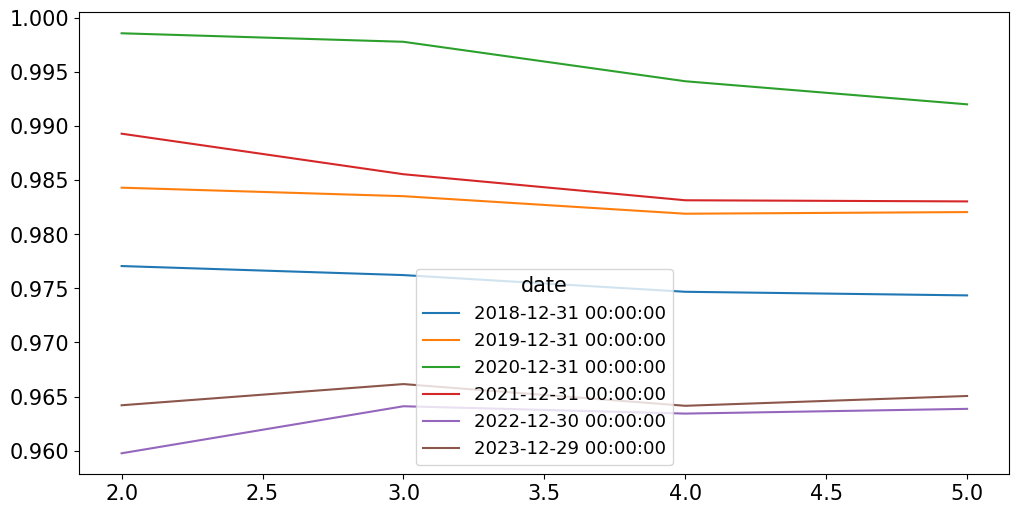

In [43]:
F.T.plot()

## 1.2



Use $F$ above to calculate the continuously compounded forward rates, $f$, at the six dates.

Make a plot of the curve, $f$, at each of these six dates.

In [44]:
f = -np.log(F)
f.insert(0,1,spots[1])
f

,1,2,3,4,5
date,,,,,
2018-12-31,0.026026,0.023207,0.024061,0.025642,0.025984
2019-12-31,0.015729,0.015825,0.016624,0.018272,0.018117
2020-12-31,0.001042,0.001441,0.002229,0.005889,0.008035
2021-12-31,0.003834,0.010772,0.014564,0.017008,0.017115
2022-12-30,0.046425,0.041064,0.036548,0.037252,0.036799
2023-12-29,0.047314,0.036454,0.034427,0.036505,0.035566


<Axes: >

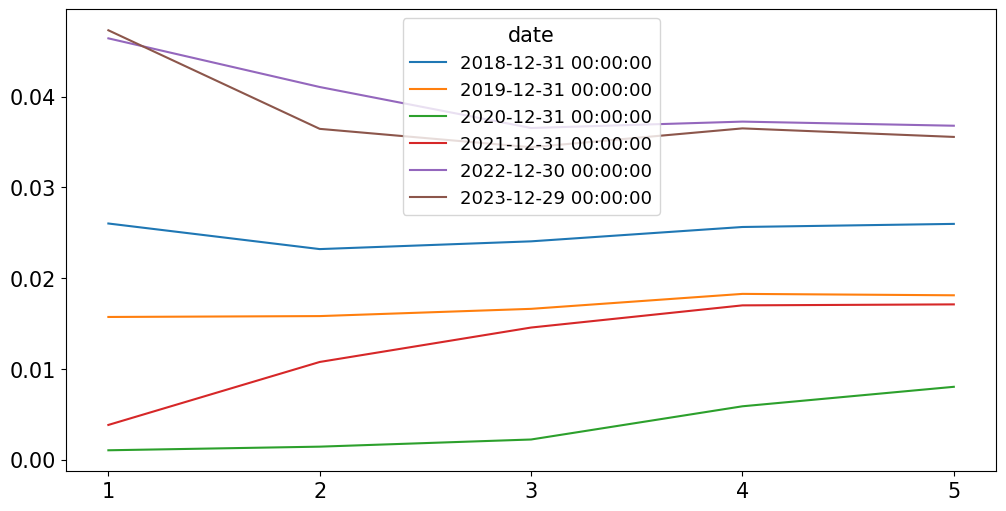

In [45]:
f.T.plot(xticks=f.columns)

## 1.3

Calculate the continuously compounded spot rates, $r$, at the six dates.

Plot both the forward curve and the spot curve on the date of Dec 2018.

Recall that $f(t,t,t+1) = r(t,t+1)$.

In [46]:
DATE = '2018'

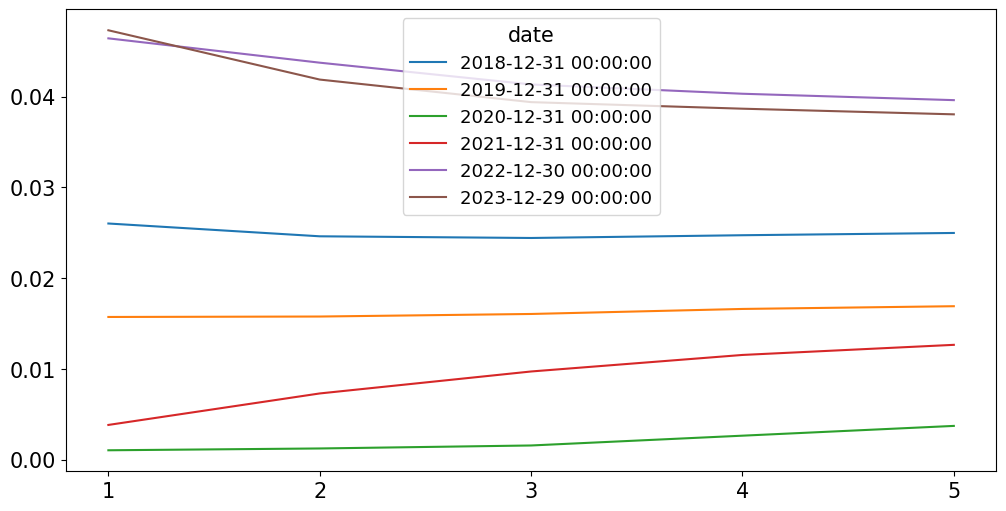

In [47]:
spots.T.plot(xticks=spots.columns);

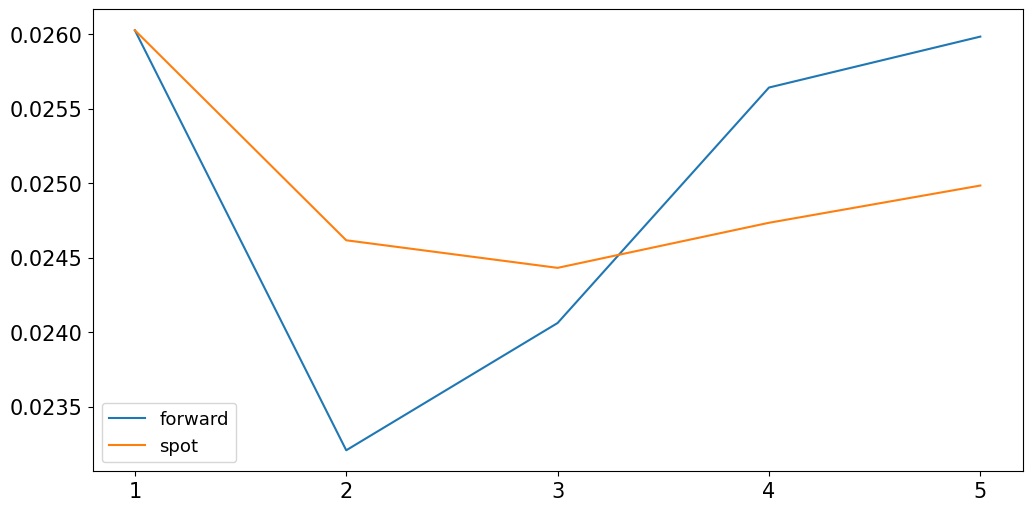

In [48]:
ax = f.loc[DATE].T.plot(xticks=f.columns)
spots.loc[DATE].T.plot(ax=ax)
ax.legend(['forward','spot']);

## 1.4

Plot the forward curve on Dec 2018 against the time-series evolution of $r(t,t+1)$ for dates $t$ between Dec 2018 and Dec 2022.

How does the evolution of one-year rates between 2018-2022 compare to the forward rates of 2018?

In [49]:
temp = f.loc[DATE].T

temp.columns.name = f'{DATE}: (n-1) to n'
temp.columns = [f'forward curve']
if DATE == '2018':
    temp['spot over time'] = spots[1].values[:-1]
elif DATE == '2019':
    temp['spot over time'] = spots[1].values[1:]

temp

,forward curve,spot over time
1,0.026026,0.026026
2,0.023207,0.015729
3,0.024061,0.001042
4,0.025642,0.003834
5,0.025984,0.046425


The realized one-year spot rates over 2019-2023 are generally much lower than what was implied by the 2018 forward curve.

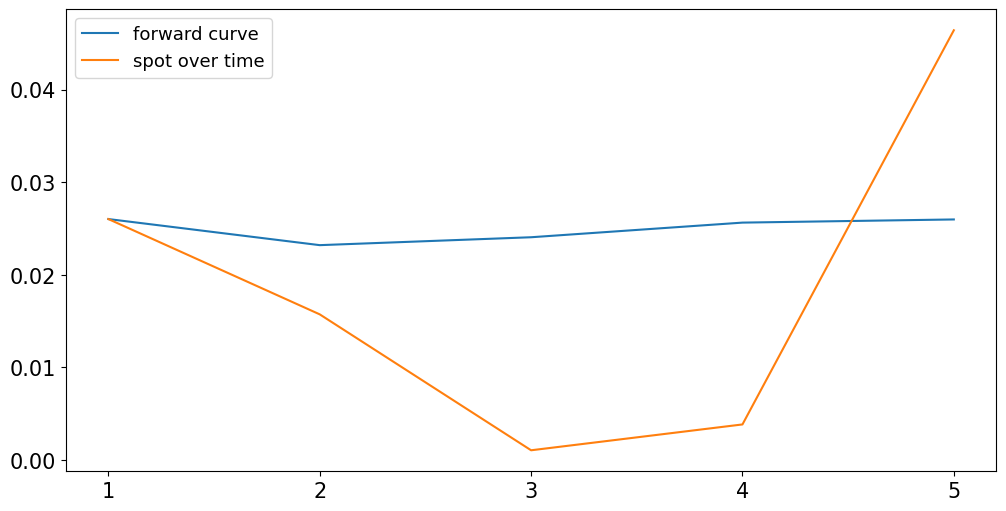

In [50]:
ax = temp.plot(xticks=temp.index)

***

# 2. Carry Trade

In [51]:
HAIRCUT = .02
INIT_SIZE = 1e8
FACE = 1e6

In [52]:
p = px.copy()
p.insert(0,'cash',1)
p *= FACE

## 2.1

Suppose it is December 2018, and you determine to implement a carry trade with the following specification...

* Long \\$100 million (market value, not face value) of the 5-year zero-coupon bond (maturing Dec 2023.)
* Short \\$100 million (market value, not face value) of the 1-year zero-coupon bond (maturing Dec 2019.)
* Assume there is a 2% haircut on each side of the trade, so it requires \\$4 million of investor capital to initiate it.

1. Calculate the total profit and loss year-by-year.
1. Calculate the total return (Dec 2023) on the initial \\$4 million of investor capital.

#### Short position
* Each year you will roll over the short position to maintain a short \\$100 million (market value) in the 1-year bond.
* This will require injecting more cash into the trade, as the expiring short will require more than \$100 million to close out. 
* In Dec 2022, no need to open a new short position, as your long position will (at that point) be a one-year bond.

#### Alternatives
The scheme above is for simplicity. You could try more interesting ways of setting the short position...
* Open a new short position sized to whatever is needed to cover the expiring short position.
* Set the short positions to duration-hedge the long position.

In [53]:
value = pd.DataFrame(dtype=float, columns=p.columns, index=p.index)
pnl = pd.DataFrame(dtype=float, columns=p.columns, index=p.index)

pnl.loc['2018'] = 0
value.loc['2018'] = np.array([0,-INIT_SIZE,0,0,0,INIT_SIZE])
positions = value / p

dt_end = p.index[-1]

for i, dt in enumerate(p.index[1:]):
    dt_lag = p.index[i]
    
    positions.loc[dt] = positions.loc[dt_lag].shift(-1)
    positions.loc[dt,5] = 0        

    
    if dt != dt_end:
        positions.loc[dt,1] += -INIT_SIZE / p.loc[dt,1]
        positions.loc[dt,'cash'] += INIT_SIZE / p.loc[dt,'cash']

    value.loc[dt] = positions.loc[dt] * p.loc[dt]
    pnl.loc[dt] = value.loc[dt] - value.loc[dt_lag]
    pnl.loc[dt,'cash'] = value.loc[dt,'cash']
    
    
pnl.insert(0,'net',pnl.sum(axis=1))
pnl.loc['cumulative','net'] = pnl['net'].sum()

In [54]:
positions.replace(0,np.nan,inplace=True)
positions.style.format('{:,.5}',na_rep='')

,cash,1,2,3,4,5
date,,,,,,
2018-12-31 00:00:00,,-102.64,,,,113.31
2019-12-31 00:00:00,-2.6368,-101.59,,,113.31,
2020-12-31 00:00:00,-1.5853,-100.1,,113.31,,
2021-12-31 00:00:00,-0.10424,-100.38,113.31,,,
2022-12-30 00:00:00,-0.38415,8.5538,,,,
2023-12-29 00:00:00,8.5538,,,,,


In [55]:
value.replace(0,np.nan,inplace=True)
value.style.format('${:,.2f}',na_rep='')

,cash,1,2,3,4,5
date,,,,,,
2018-12-31 00:00:00,,"$-100,000,000.00",,,,"$100,000,000.00"
2019-12-31 00:00:00,"$-2,636,787.00","$-100,000,000.00",,,"$106,021,315.23",
2020-12-31 00:00:00,"$-1,585,323.78","$-100,000,000.00",,"$112,773,076.00",,
2021-12-31 00:00:00,"$-104,244.84","$-100,000,000.00","$111,662,841.48",,,
2022-12-30 00:00:00,"$-384,148.40","$8,165,785.45",,,,
2023-12-29 00:00:00,"$8,553,819.87",,,,,


In [56]:
pnl.replace(0,np.nan,inplace=True)
pnl.style.format('${:,.2f}',na_rep='')

,net,cash,1,2,3,4,5
date,,,,,,,
2018-12-31 00:00:00,,,,,,,
2019-12-31 00:00:00,"$3,384,528.23","$-2,636,787.00",,,,"$106,021,315.23","$-100,000,000.00"
2020-12-31 00:00:00,"$5,166,436.98","$-1,585,323.78",,,"$112,773,076.00","$-106,021,315.23",
2021-12-31 00:00:00,"$-1,214,479.36","$-104,244.84",,"$111,662,841.48","$-112,773,076.00",,
2022-12-30 00:00:00,"$-3,881,204.42","$-384,148.40","$108,165,785.45","$-111,662,841.48",,,
2023-12-29 00:00:00,"$388,034.42","$8,553,819.87","$-8,165,785.45",,,,
cumulative,"$3,843,315.85",,,,,,


In [70]:
capital = HAIRCUT * INIT_SIZE * 2

cum_ret = pnl['net'].cumsum().drop('cumulative') / capital - 1
cum_ret.name = 'cumulative return'
cum_ret = cum_ret.iloc[-5:]
cum_ret

date
2019-12-31 00:00:00   -0.153868
2020-12-31 00:00:00    1.137741
2021-12-31 00:00:00    0.834121
2022-12-30 00:00:00   -0.136180
2023-12-29 00:00:00   -0.039171
Name: cumulative return, dtype: float64

## 2.2

How would this trade play out if the path of one-year spot rates equaled the forward rates observed in 2018?

In this scenario, the trade wouldn't be profitable: the return to holding the 5-year bond would equal the return to holding the one-year bond and rolling it over five years.

## 2.3

Given Fact 3 of the *dynamic* (conditional) tests of EH in notebook W.5., do you expect that as of Dec 2023 the long-short trade above looks more or less favorable for Dec 2023-2028 than it did for Dec 2018-2023?

In [71]:
f-spots

,1,2,3,4,5
date,,,,,
2018-12-31,0.0,-0.001410,-0.000370,0.000908,0.001000
2019-12-31,0.0,0.000048,0.000564,0.001659,0.001204
2020-12-31,0.0,0.000200,0.000658,0.003238,0.004308
2021-12-31,0.0,0.003469,0.004841,0.005463,0.004456
2022-12-30,0.0,-0.002681,-0.004797,-0.003071,-0.002819
2023-12-29,0.0,-0.005430,-0.004972,-0.002170,-0.002487


This is a question as to whether the forward-spot spread is bigger in 2018 or 2023. In W.5., we learned (in Dynamic Fact 3) that in times of higher forward-spot spreads, the expected excess return and realized yields are larger.

The table below shows that the forward-spot spread on 5-year bonds was 10bps in 2018 and negative 25bps in 2023. Thus, we expect that the return to this trade (long 5-year bond, short 1-year bond) will be substantially worse in 2023-2028.



***